### Data Exploration 

In [1]:
# import libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# import warnings
# warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Data/preprocessed_dataset.csv')

In [3]:
# show a random row
df.sample()

,year,life_ladder_year_median,country,region,subregion,least_developed_countries,session,speech,life_ladder,log_gdp_per_capita,...,imports,exports,fear,anger,surprise,sadness,disgust,joy,anticipation,happiness_classification
776,2013,5.243996,Malaysia,Asia,South-eastern Asia,no,68,allow begin congratulating president general a...,5.7702,10.014623,...,206117.983344,228391.943719,0.121528,0.102431,0.027778,0.071181,0.03125,0.069444,0.067708,happy


In [4]:
# all columns
print(df.columns.values)

# Quantiles, mean, min, max etc. of the dataset
df.describe()

['year' 'life_ladder_year_median' 'country' 'region' 'subregion'
 'least_developed_countries' 'session' 'speech' 'life_ladder'
 'log_gdp_per_capita' 'social_support' 'healthy_life_expectancy'
 'choice_freedom' 'generosity' 'corruption_perception' 'positive_affect'
 'negative_affect' 'imports' 'exports' 'fear' 'anger' 'surprise' 'sadness'
 'disgust' 'joy' 'anticipation' 'happiness_classification']


,year,life_ladder_year_median,session,life_ladder,log_gdp_per_capita,social_support,healthy_life_expectancy,choice_freedom,generosity,corruption_perception,...,negative_affect,imports,exports,fear,anger,surprise,sadness,disgust,joy,anticipation
count,932.000000,932.000000,932.000000,932.000000,931.000000,923.000000,932.000000,915.000000,893.000000,884.000000,...,924.000000,9.220000e+02,9.320000e+02,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000
mean,2010.247854,5.272863,65.247854,5.417612,9.283642,0.811340,62.256888,0.721001,-0.003197,0.760929,...,0.252097,1.019944e+05,1.014837e+05,0.075670,0.051411,0.029827,0.044616,0.027439,0.076742,0.096576
std,2.616100,0.233604,2.616100,1.136924,1.159361,0.122588,7.670700,0.148572,0.160304,0.187570,...,0.074374,2.472245e+05,2.648477e+05,0.019524,0.017498,0.008472,0.014982,0.010819,0.014780,0.014955
min,2005.000000,4.946978,60.000000,2.807855,6.686863,0.290934,6.720000,0.257534,-0.318965,0.035198,...,0.095490,1.804293e+02,2.782427e+01,0.021505,0.005025,0.004808,0.000000,0.000000,0.015038,0.045113
25%,2008.000000,5.200385,63.000000,4.568504,8.328848,0.747546,57.775000,0.630330,-0.110483,0.705883,...,0.198770,6.297772e+03,2.525648e+03,0.062266,0.039511,0.024183,0.033948,0.020000,0.067201,0.086521
50%,2011.000000,5.221557,66.000000,5.251856,9.370765,0.839424,64.500000,0.736290,-0.022674,0.815025,...,0.245130,1.909632e+04,1.406147e+04,0.074297,0.049796,0.029584,0.043615,0.026588,0.076702,0.096375
75%,2012.000000,5.312550,67.000000,6.291683,10.184890,0.905293,67.660004,0.835830,0.083435,0.890023,...,0.295140,7.351114e+04,7.711130e+04,0.087869,0.061665,0.035206,0.054884,0.034267,0.085997,0.106643
max,2014.000000,6.600104,69.000000,8.018934,11.646967,0.982522,73.480003,0.971135,0.702708,0.983276,...,0.563631,2.519304e+06,2.818427e+06,0.165254,0.126783,0.063679,0.100962,0.061275,0.143275,0.146186


In [5]:
# Describe null values in dataset and where they are
print(df.isnull().sum())
print("")

# Percentage of null values from total column
# Grey source reference: https://www.analyticsvidhya.com/blog/2022/07/step-by-step-exploratory-data-analysis-eda-using-python/
print((df.isnull().sum()/len(df))*100) 

year                          0
life_ladder_year_median       0
country                       0
region                        0
subregion                     0
least_developed_countries     0
session                       0
speech                        0
life_ladder                   0
log_gdp_per_capita            1
social_support                9
healthy_life_expectancy       0
choice_freedom               17
generosity                   39
corruption_perception        48
positive_affect              16
negative_affect               8
imports                      10
exports                       0
fear                          0
anger                         0
surprise                      0
sadness                       0
disgust                       0
joy                           0
anticipation                  0
happiness_classification      0
dtype: int64

year                         0.000000
life_ladder_year_median      0.000000
country                      0.000000
region  

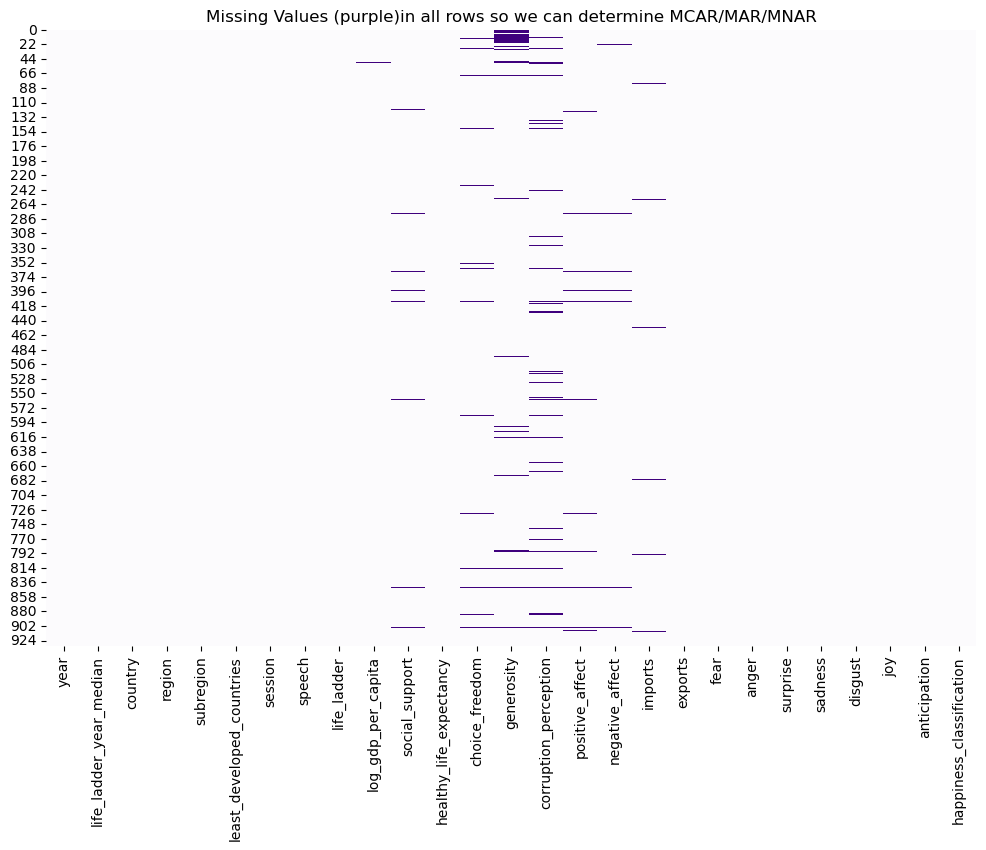

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your DataFrame is named 'df' with the columns you mentioned
# You can replace 'df' with your actual DataFrame name

# Create a Boolean DataFrame where missing values are True
missing_values = df.isnull()

# Create a heatmap of missing values
plt.figure(figsize=(12, 8))
sns.heatmap(missing_values, cbar=False, cmap='Purples')
plt.title('Missing Values (purple)in all rows so we can determine MCAR/MAR/MNAR')
plt.show()


In [7]:
# Number of unique values
print(df.nunique())

year                          10
life_ladder_year_median       10
country                      135
region                         5
subregion                     14
least_developed_countries      2
session                       10
speech                       932
life_ladder                  932
log_gdp_per_capita           931
social_support               923
healthy_life_expectancy      625
choice_freedom               915
generosity                   893
corruption_perception        884
positive_affect              916
negative_affect              924
imports                      922
exports                      932
fear                         878
anger                        885
surprise                     815
sadness                      852
disgust                      847
joy                          858
anticipation                 857
happiness_classification       2
dtype: int64


/Users/sioncoolwijk/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sioncoolwijk/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<AxesSubplot:title={'center':'Amount of data (subregions+year) sorted by average happiness'}, xlabel='year', ylabel='subregion'>

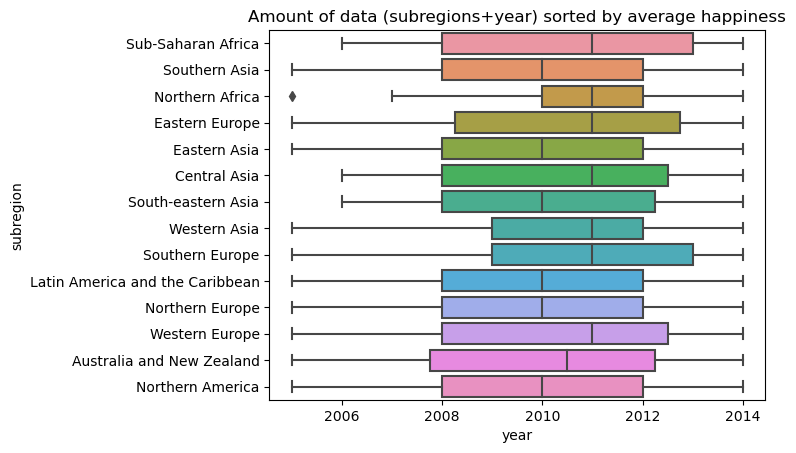

In [8]:
# Distribution of values (as in rows for that country plus year) that we have
plt.title("Amount of data (subregions+year) sorted by average happiness")
sns.boxplot(x=df.year, y=df.subregion, order=df.groupby('subregion').life_ladder.mean().sort_values().index)

<AxesSubplot:title={'center':'Correlation Matrix of all useful and numerous values in the df'}>

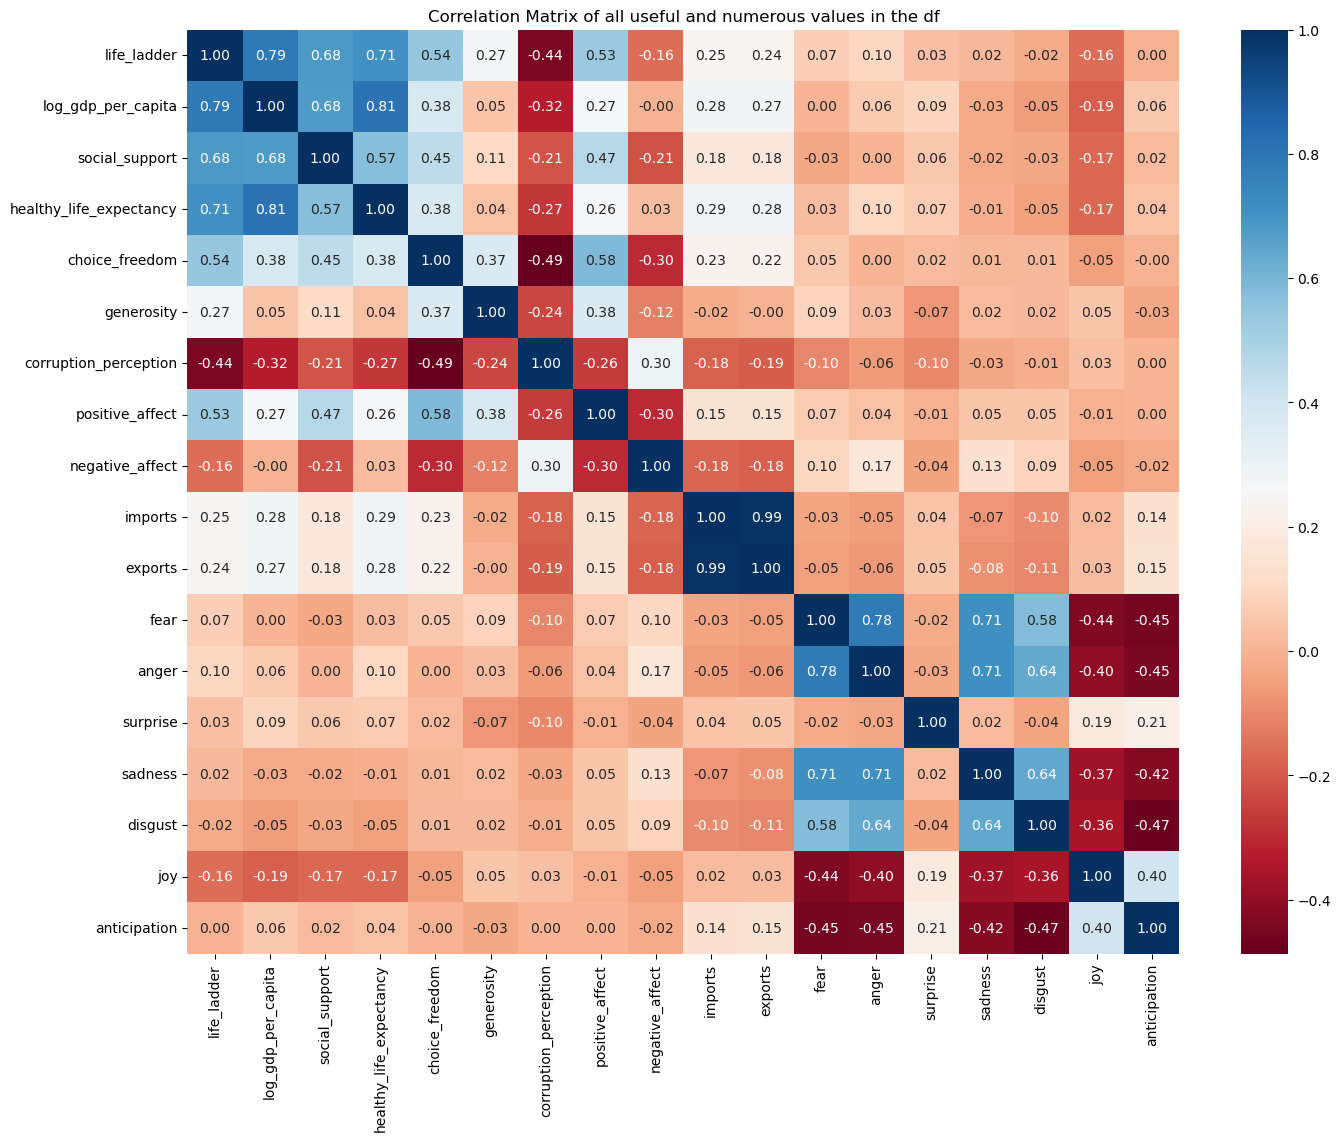

In [9]:
# Get all the numerous and useful features in a new df
numeric_df = pd.DataFrame(data= df[['life_ladder', 'log_gdp_per_capita', 'social_support', 'healthy_life_expectancy', \
              'choice_freedom', 'generosity', 'corruption_perception', 'positive_affect','negative_affect', \
              'imports', 'exports', 'fear', 'anger', 'surprise', 'sadness', 'disgust', 'joy', 'anticipation']])


correlation_matrix= numeric_df.corr(method='pearson')

# Create a heatmap with conditional formatting
plt.figure(figsize=(16, 12)) 
plt.title("Correlation Matrix of all useful and numerous values in the df")
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='RdBu')

array([[<AxesSubplot:xlabel='life_ladder', ylabel='life_ladder'>,
        <AxesSubplot:xlabel='log_gdp_per_capita', ylabel='life_ladder'>],
       [<AxesSubplot:xlabel='life_ladder', ylabel='log_gdp_per_capita'>,
        <AxesSubplot:xlabel='log_gdp_per_capita', ylabel='log_gdp_per_capita'>]],
      dtype=object)

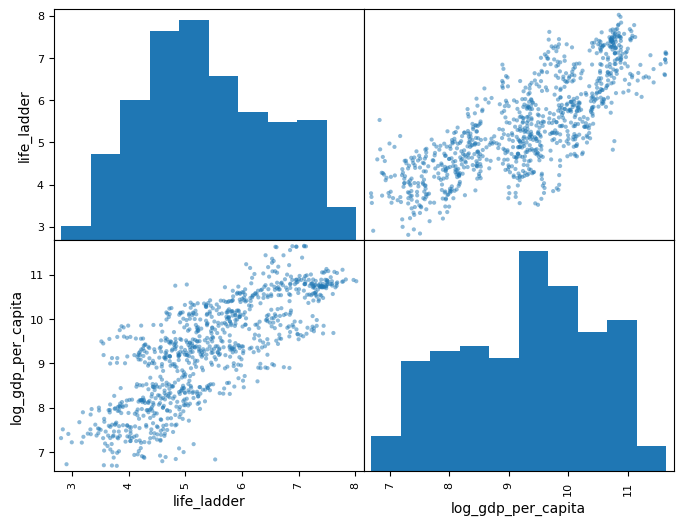

In [10]:

# Looking at some matrixes in the dataframe these two variables show great regression possibilities
small_numeric_df = pd.DataFrame(data= df[['life_ladder', 'log_gdp_per_capita']])
pd.plotting.scatter_matrix(small_numeric_df, figsize=(8,6))